# Credit Card Fraud Detection Results of Different Models

## Libraries 

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
from tabulate import tabulate

class_label = ['Non-Default(0)','Default(1)'] # env var

## Dataset

### Importing the Dataset

In [2]:
data = pd.read_csv('creditcard.csv')

### Spliting the dataset into features (X) and target (y) and split them into training and test set

<Axes: xlabel='Class', ylabel='count'>

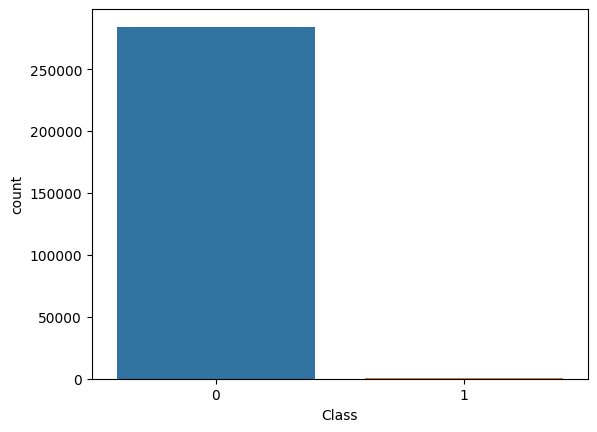

In [3]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sns.countplot(x='Class',data=data)

## Machine Learning Models

### XGBoost

#### Creating XGBoost and fitting

In [4]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

#### Making Predictions on test data

In [5]:
xgb_y_pred = xgb_classifier.predict(X_test)

### Feature Scaling

In [6]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Decision Tree Classifier

#### Creating Decision Tree Classifier and Fitting

In [7]:
dtc = DecisionTreeClassifier(max_depth=4,random_state=42,criterion='entropy')
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

#### Making predictions on test data 

In [8]:
dtc_y_pred = dtc.predict(X_test)

### K-Nearest-Neighbour

#### Creating KNNClassifier and fitting

In [9]:
knn_classifier= KNeighborsClassifier(n_neighbors = 5) 
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier()

#### Making Predictions on test data

In [10]:
knn_y_pred = knn_classifier.predict(X_test)

### Logistic Regression

#### Creating LogisticRegression and fitting

In [11]:
log_classifier= LogisticRegression(random_state=42)  
log_classifier.fit(X_train, Y_train)

LogisticRegression(random_state=42)

#### Making Predictions on test data

In [12]:
log_y_pred = log_classifier.predict(X_test)

### Support Vector Machine

#### Creating SVC and fitting

In [13]:
svm_classifier = SVC(kernel = 'linear', random_state = 42)
svm_classifier.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

#### Making prediction on test data

In [14]:
svm_y_pred = svm_classifier.predict(X_test)

### Random Forest

#### Creating RandomForest and fitting

In [15]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

#### Making Predictions on test data

In [16]:
rf_y_pred = rf_classifier.predict(X_test)

### Confusion Matrices on Different Models

#### Decision Tree

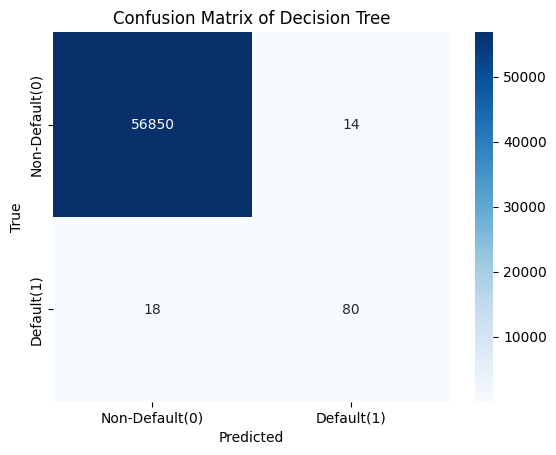

In [17]:
cm_dt = confusion_matrix(Y_test, dtc_y_pred)
sns.heatmap(cm_dt,annot=True,fmt='d',xticklabels=class_label, yticklabels=class_label, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix of Decision Tree")
plt.show()

#### K-Nearest-Neighbour

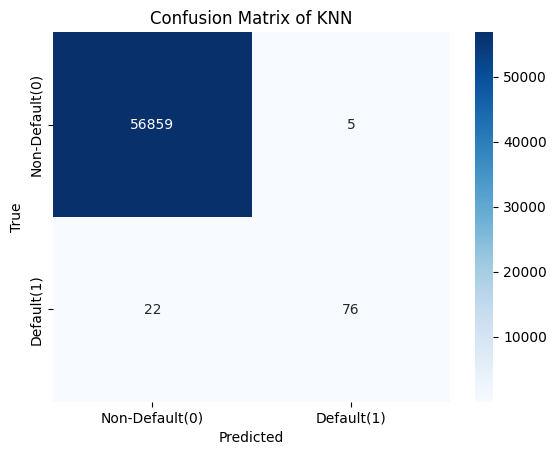

In [18]:
cm_knn = confusion_matrix(Y_test, knn_y_pred)
sns.heatmap(cm_knn,annot=True,fmt='d',xticklabels=class_label, yticklabels=class_label, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix of KNN")
plt.show()

#### Logistic Regression

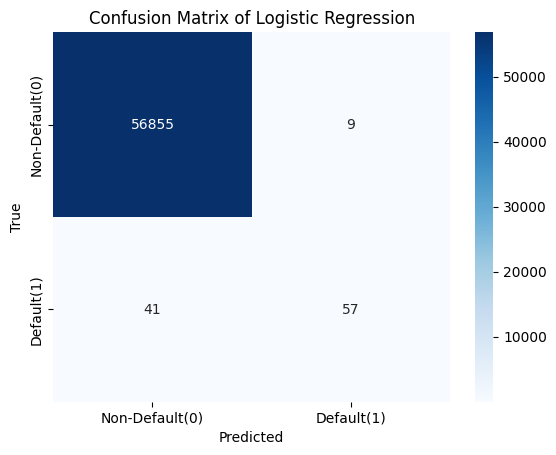

In [19]:
cm_log = confusion_matrix(Y_test, log_y_pred)
sns.heatmap(cm_log,annot=True,fmt='d',xticklabels=class_label, yticklabels=class_label, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

#### Support Vector Machine

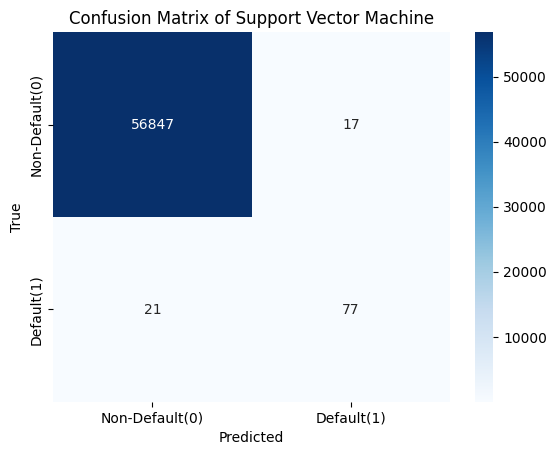

In [20]:
cm_svm = confusion_matrix(Y_test, svm_y_pred)
sns.heatmap(cm_svm,annot=True,fmt='d',xticklabels=class_label, yticklabels=class_label, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix of Support Vector Machine")
plt.show()

#### Random Forest

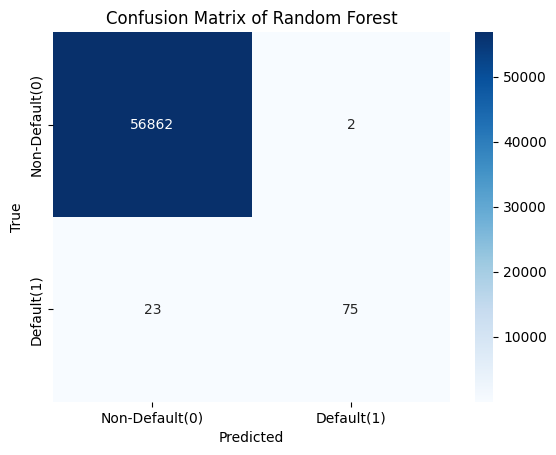

In [21]:
cm_rf = confusion_matrix(Y_test, rf_y_pred)
sns.heatmap(cm_rf,annot=True,fmt='d',xticklabels=class_label, yticklabels=class_label, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix of Random Forest")
plt.show()

#### XGBoost

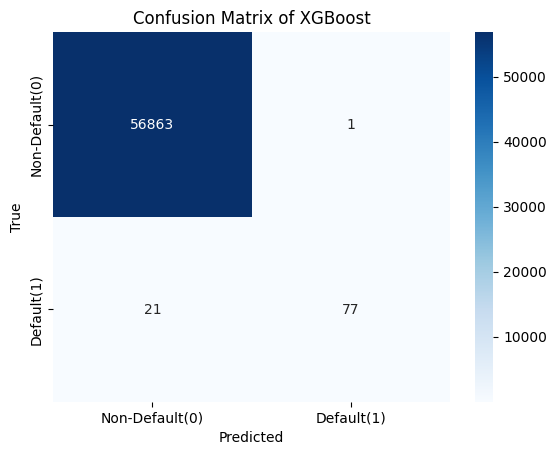

In [22]:
cm_xgb = confusion_matrix(Y_test, xgb_y_pred)
sns.heatmap(cm_xgb,annot=True,fmt='d',xticklabels=class_label, yticklabels=class_label, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix of XGBoost")
plt.show()

### Evaluating the Models And the Results

#### Calculating Accuracy Score and F-1 Score

In [23]:
# Accuracy Score
dtc_acc_score = accuracy_score(Y_test, dtc_y_pred)*100
knn_acc_score = accuracy_score(Y_test, knn_y_pred)*100
log_acc_score = accuracy_score(Y_test, log_y_pred)*100
svm_acc_score = accuracy_score(Y_test, svm_y_pred)*100
rf_acc_score = accuracy_score(Y_test, rf_y_pred)*100
xgb_acc_score = accuracy_score(Y_test, xgb_y_pred)*100

# F-1 Score
dtc_f1_score = f1_score(Y_test, dtc_y_pred)*100
knn_f1_score = f1_score(Y_test, knn_y_pred)*100
log_f1_score = f1_score(Y_test, log_y_pred)*100
svm_f1_score = f1_score(Y_test, svm_y_pred)*100
rf_f1_score = f1_score(Y_test, rf_y_pred)*100
xgb_f1_score = f1_score(Y_test, xgb_y_pred)*100

#### Results

In [24]:
header = ["Model","Accuracy","F-1"]
results = [
    ["Decicion Tree","{:.2f}%".format(dtc_acc_score),"{:.2f}%".format(dtc_f1_score)],
    ["KNN","{:.2f}%".format(knn_acc_score),"{:.2f}%".format(knn_f1_score)],
    ["Logistic Regression","{:.2f}%".format(log_acc_score),"{:.2f}%".format(log_f1_score)],
    ["SVM","{:.2f}%".format(svm_acc_score),"{:.2f}%".format(svm_f1_score)],
    ["Random Forest","{:.2f}%".format(rf_acc_score),"{:.2f}%".format(rf_f1_score)],
    ["XGBoost","{:.2f}%".format(xgb_acc_score),"{:.2f}%".format(xgb_f1_score)],
]
print("Results: ")
print(tabulate(results, headers=header, tablefmt="outline"))

Results: 
+---------------------+------------+--------+
| Model               | Accuracy   | F-1    |
+=====================+============+========+
| Decicion Tree       | 99.94%     | 83.33% |
| KNN                 | 99.95%     | 84.92% |
| Logistic Regression | 99.91%     | 69.51% |
| SVM                 | 99.93%     | 80.21% |
| Random Forest       | 99.96%     | 85.71% |
| XGBoost             | 99.96%     | 87.50% |
+---------------------+------------+--------+


## Convolutional Neural Network Model

### Scale the features

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data['Time'] = scaler.fit_transform(data['Time'].values.reshape(-1, 1))

### Reshape the data for CNN

In [26]:
X_train_cnn = (X_train - X_train.mean()) / X_train.std()
X_test_cnn = (X_test - X_train.mean()) / X_train.std()

X_train_cnn = X_train_cnn.values.reshape(-1, 30, 1)
X_test_cnn = X_test_cnn.values.reshape(-1, 30, 1)

### Defining the CNN models

#### Model with 5 layers

In [27]:
model_5 = keras.Sequential([
    keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    keras.layers.BatchNormalization(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=1, activation='sigmoid')
])

#### Model with 11 layers

In [28]:
model_11 = keras.models.Sequential([
    keras.layers.Reshape((30, 1), input_shape=(X_train_cnn.shape[1],1)),
    keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

#### Model with 13 layers

In [29]:
model_13 = keras.Sequential()

model_13.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
model_13.add(BatchNormalization())
model_13.add(Dropout(0.2))

model_13.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model_13.add(BatchNormalization())
model_13.add(Dropout(0.5))

model_13.add(Flatten())
model_13.add(Dense(256, activation='relu'))
model_13.add(Dropout(0.2))

model_13.add(Dense(100,activation="relu"))
model_13.add(Dense(50,activation="relu"))
model_13.add(Dense(25,activation="relu"))
model_13.add(Dense(1,activation="sigmoid"))

#### Model with 14 layers

In [30]:
model_14 = keras.Sequential([
    keras.layers.Conv1D(filters=32,kernel_size=2,activation="relu",input_shape=(X_train_cnn.shape[1],1)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    keras.layers.Conv1D(filters=64,kernel_size=2,activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(50,activation="relu"),
    keras.layers.Dense(25,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid"),
])

#### Model with 17 layers

In [31]:
model_17 = keras.Sequential([
    keras.layers.Conv1D(filters=32,kernel_size=2,activation="relu",input_shape=(X_train_cnn.shape[1],1)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    keras.layers.Conv1D(filters=64,kernel_size=2,activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Conv1D(filters=64,kernel_size=2,activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dropout(0.5), 

    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(50,activation="relu"),
    keras.layers.Dense(25,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid"),   
])

#### Model with 20 layers

In [32]:
model_20 = keras.Sequential([
    keras.layers.Conv1D(filters=32,kernel_size=2,activation="relu",input_shape=(X_train_cnn.shape[1],1)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv1D(filters=64,kernel_size=2,activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Conv1D(filters=64,kernel_size=2,activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Conv1D(filters=64,kernel_size=2,activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.25),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dropout(0.5), 

    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(50,activation="relu"),
    keras.layers.Dense(25,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid"),
])

### Compiling and Fitting

#### 5 Layered CNN

In [33]:
model_5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_5 = model_5.fit(X_train_cnn, Y_train, epochs=20, validation_split=0.2, batch_size=64)

Epoch 1/20
2849/2849 [==============================] - 8s 2ms/step - loss: 0.0072 - accuracy: 0.9983 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 2/20
2849/2849 [==============================] - 7s 2ms/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0031 - val_accuracy: 0.9993
Epoch 3/20
2849/2849 [==============================] - 7s 2ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0036 - val_accuracy: 0.9993
Epoch 4/20
2849/2849 [==============================] - 7s 2ms/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 5/20
2849/2849 [==============================] - 6s 2ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0039 - val_accuracy: 0.9992
Epoch 6/20
2849/2849 [==============================] - 7s 2ms/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0033 - val_accuracy: 0.9994
Epoch 7/20
2849/2849 [==============================] - 7s 2ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0028 - val_accuracy:

#### 11 Layered CNN

In [34]:
model_11.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_11 = model_11.fit(X_train, Y_train, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
2849/2849 [==============================] - 18s 6ms/step - loss: 0.0056 - accuracy: 0.9989 - val_loss: 0.0032 - val_accuracy: 0.9993
Epoch 2/20
2849/2849 [==============================] - 18s 6ms/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0031 - val_accuracy: 0.9993
Epoch 3/20
2849/2849 [==============================] - 17s 6ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0038 - val_accuracy: 0.9993
Epoch 4/20
2849/2849 [==============================] - 18s 6ms/step - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0.0033 - val_accuracy: 0.9994
Epoch 5/20
2849/2849 [==============================] - 17s 6ms/step - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0031 - val_accuracy: 0.9993
Epoch 6/20
2849/2849 [==============================] - 17s 6ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0036 - val_accuracy: 0.9994
Epoch 7/20
2849/2849 [==============================] - 17s 6ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0037 - val_ac

#### 13 Layered CNN

In [35]:
model_13.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
history_13 = model_13.fit(X_train, Y_train, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50
2849/2849 [==============================] - 30s 10ms/step - loss: 0.0072 - accuracy: 0.9985 - val_loss: 0.0045 - val_accuracy: 0.9983
Epoch 2/50
2849/2849 [==============================] - 29s 10ms/step - loss: 0.0045 - accuracy: 0.9992 - val_loss: 0.0050 - val_accuracy: 0.9991
Epoch 3/50
2849/2849 [==============================] - 29s 10ms/step - loss: 0.0045 - accuracy: 0.9993 - val_loss: 0.0058 - val_accuracy: 0.9989
Epoch 4/50
2849/2849 [==============================] - 29s 10ms/step - loss: 0.0045 - accuracy: 0.9993 - val_loss: 0.0043 - val_accuracy: 0.9993
Epoch 5/50
2849/2849 [==============================] - 29s 10ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 6/50
2849/2849 [==============================] - 28s 10ms/step - loss: 0.0043 - accuracy: 0.9994 - val_loss: 0.0045 - val_accuracy: 0.9989
Epoch 7/50
2849/2849 [==============================] - 29s 10ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0034 -

#### 14 Layered CNN

In [36]:
model_14.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_14 = model_14.fit(X_train_cnn, Y_train, epochs=100,batch_size=64, validation_split=0.2)

Epoch 1/100
2849/2849 [==============================] - 19s 6ms/step - loss: 0.0081 - accuracy: 0.9989 - val_loss: 0.0036 - val_accuracy: 0.9993
Epoch 2/100
2849/2849 [==============================] - 17s 6ms/step - loss: 0.0051 - accuracy: 0.9992 - val_loss: 0.0031 - val_accuracy: 0.9994
Epoch 3/100
2849/2849 [==============================] - 17s 6ms/step - loss: 0.0045 - accuracy: 0.9993 - val_loss: 0.0035 - val_accuracy: 0.9994
Epoch 4/100
2849/2849 [==============================] - 17s 6ms/step - loss: 0.0043 - accuracy: 0.9992 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 5/100
2849/2849 [==============================] - 17s 6ms/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 6/100
2849/2849 [==============================] - 17s 6ms/step - loss: 0.0045 - accuracy: 0.9993 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 7/100
2849/2849 [==============================] - 17s 6ms/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0042 -

#### 17 Layered CNN

In [37]:
model_17.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_17 = model_17.fit(X_train_cnn, Y_train, epochs=100, validation_split=0.2,batch_size=64)

Epoch 1/100
2849/2849 [==============================] - 29s 9ms/step - loss: 0.0105 - accuracy: 0.9972 - val_loss: 0.0042 - val_accuracy: 0.9981
Epoch 2/100
2849/2849 [==============================] - 26s 9ms/step - loss: 0.0054 - accuracy: 0.9988 - val_loss: 0.0033 - val_accuracy: 0.9992
Epoch 3/100
2849/2849 [==============================] - 27s 10ms/step - loss: 0.0046 - accuracy: 0.9993 - val_loss: 0.0033 - val_accuracy: 0.9993
Epoch 4/100
2849/2849 [==============================] - 27s 9ms/step - loss: 0.0047 - accuracy: 0.9993 - val_loss: 0.0051 - val_accuracy: 0.9994
Epoch 5/100
2849/2849 [==============================] - 27s 9ms/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.0043 - val_accuracy: 0.9993
Epoch 6/100
2849/2849 [==============================] - 28s 10ms/step - loss: 0.0041 - accuracy: 0.9992 - val_loss: 0.0040 - val_accuracy: 0.9992
Epoch 7/100
2849/2849 [==============================] - 27s 9ms/step - loss: 0.0041 - accuracy: 0.9992 - val_loss: 0.0033

#### 20 Layered CNN

In [38]:
model_20.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_20 = model_20.fit(X_train_cnn, Y_train, epochs=100, validation_split=0.2, batch_size=64)

Epoch 1/100
2849/2849 [==============================] - 37s 12ms/step - loss: 0.0098 - accuracy: 0.9981 - val_loss: 0.0037 - val_accuracy: 0.9992
Epoch 2/100
2849/2849 [==============================] - 35s 12ms/step - loss: 0.0052 - accuracy: 0.9990 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 3/100
2849/2849 [==============================] - 34s 12ms/step - loss: 0.0049 - accuracy: 0.9991 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 4/100
2849/2849 [==============================] - 34s 12ms/step - loss: 0.0045 - accuracy: 0.9992 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 5/100
2849/2849 [==============================] - 34s 12ms/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.0041 - val_accuracy: 0.9994
Epoch 6/100
2849/2849 [==============================] - 34s 12ms/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 7/100
2849/2849 [==============================] - 34s 12ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0

### Plotting the training and validation accuracy

#### 5 Layered CNN

##### Epoch - Accuracy

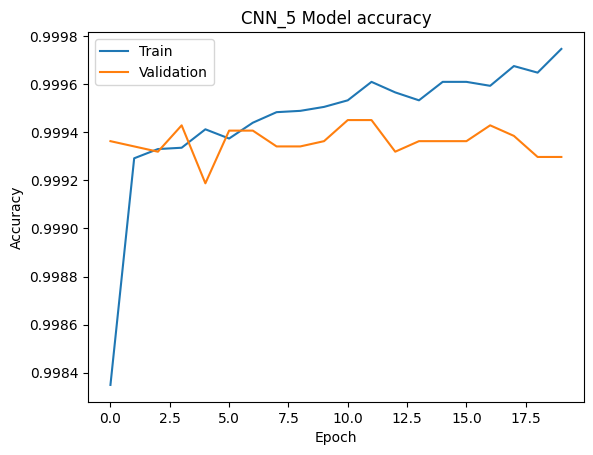

In [39]:
plt.plot(history_5.history['accuracy'])
plt.plot(history_5.history['val_accuracy'])
plt.title('CNN_5 Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

##### Epoch - Loss

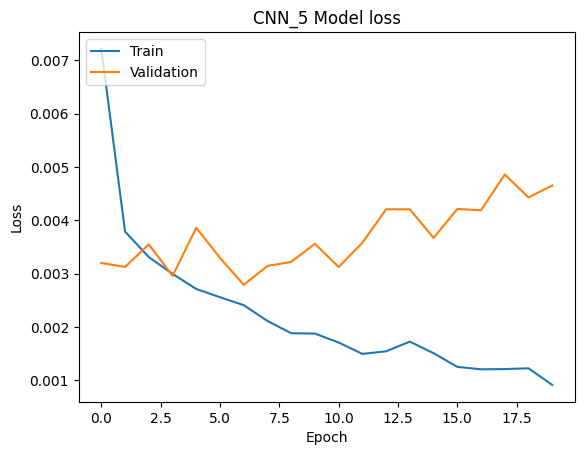

In [40]:
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('CNN_5 Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### 11 Layered CNN

##### Epoch - Accuracy

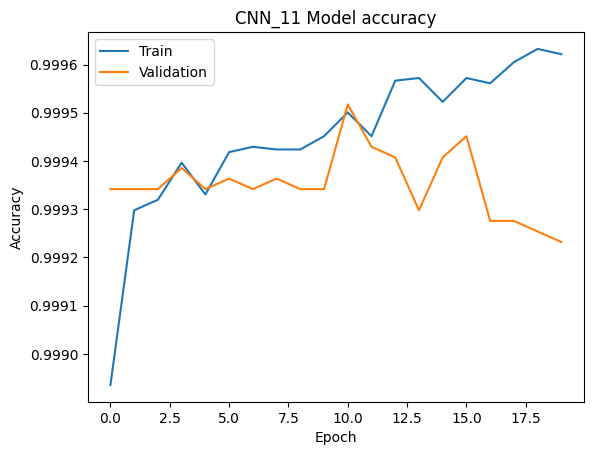

In [41]:
plt.plot(history_11.history['accuracy'])
plt.plot(history_11.history['val_accuracy'])
plt.title('CNN_11 Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

##### Epoch - Loss

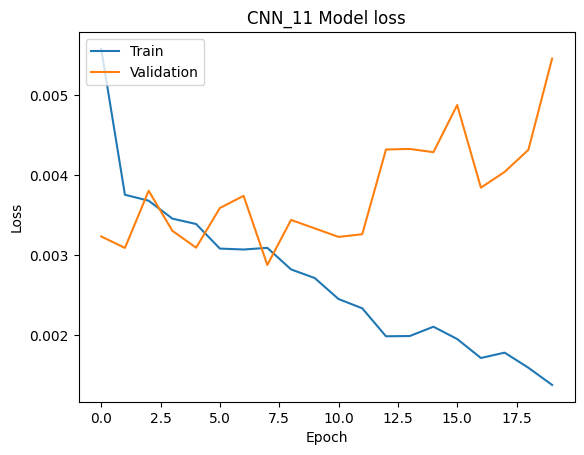

In [42]:
plt.plot(history_11.history['loss'])
plt.plot(history_11.history['val_loss'])
plt.title('CNN_11 Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### 13 Layered CNN

##### Epoch - Accuracy

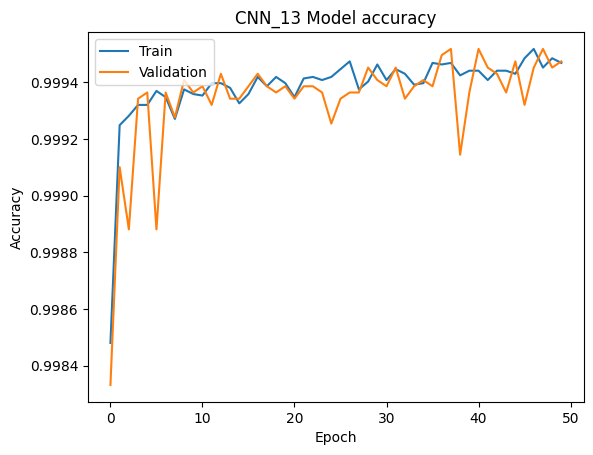

In [43]:
plt.plot(history_13.history['accuracy'])
plt.plot(history_13.history['val_accuracy'])
plt.title('CNN_13 Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

##### Epoch - Loss

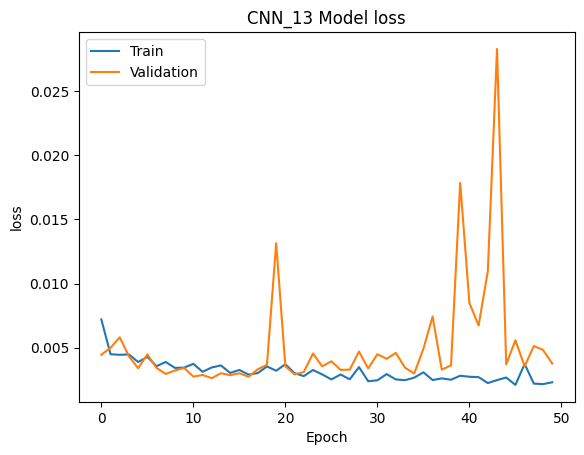

In [44]:
plt.plot(history_13.history['loss'])
plt.plot(history_13.history['val_loss'])
plt.title('CNN_13 Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### 14 Layered CNN

##### Epoch - Accuracy

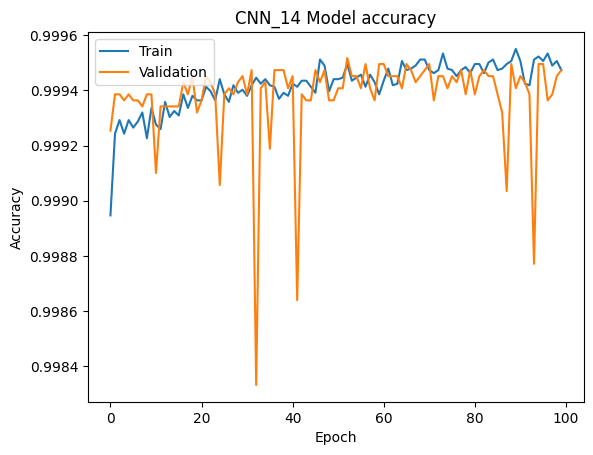

In [45]:
plt.plot(history_14.history['accuracy'])
plt.plot(history_14.history['val_accuracy'])
plt.title('CNN_14 Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

##### Epoch - Loss

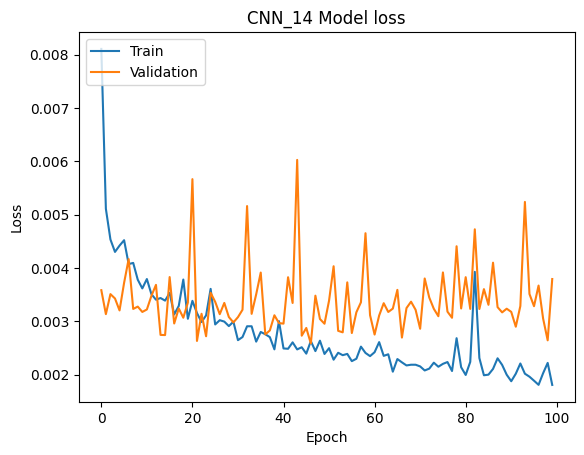

In [46]:
plt.plot(history_14.history['loss'])
plt.plot(history_14.history['val_loss'])
plt.title('CNN_14 Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### 17 Layered CNN

##### Epoch - Accuracy

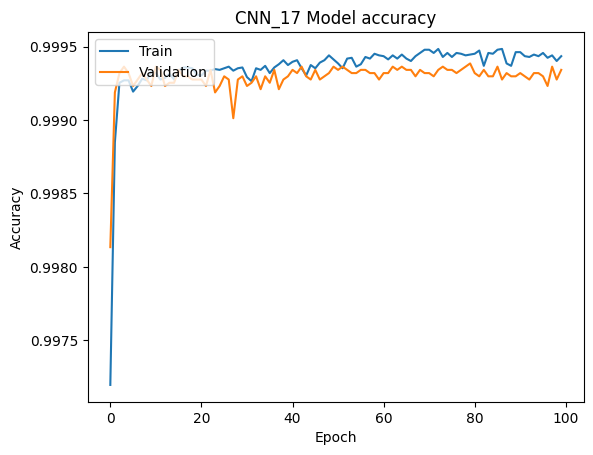

In [47]:
plt.plot(history_17.history['accuracy'])
plt.plot(history_17.history['val_accuracy'])
plt.title('CNN_17 Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

##### Epoch - Loss

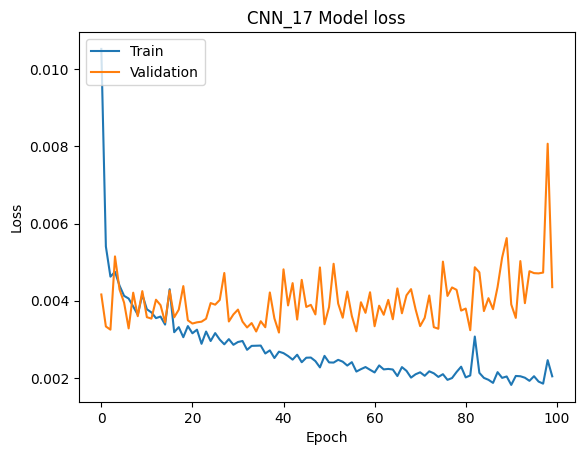

In [48]:
plt.plot(history_17.history['loss'])
plt.plot(history_17.history['val_loss'])
plt.title('CNN_17 Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### 20 Layered CNN

##### Epoch - Accuracy

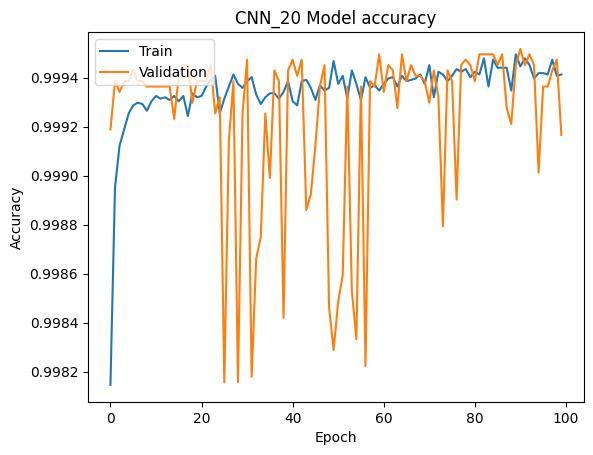

In [49]:
plt.plot(history_20.history['accuracy'])
plt.plot(history_20.history['val_accuracy'])
plt.title('CNN_20 Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

##### Epoch - Loss

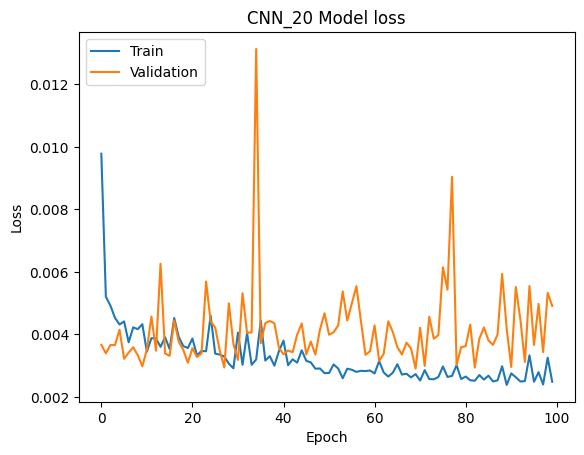

In [50]:
plt.plot(history_20.history['loss'])
plt.plot(history_20.history['val_loss'])
plt.title('CNN_20 Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Evaluating the CNN layers

#### Calculating the accuracy Scores

In [51]:
train_acc_5 = max(history_5.history['accuracy'])*100
val_acc_5 = max(history_5.history['val_accuracy'])*100

train_acc_11 = max(history_11.history['accuracy'])*100
val_acc_11 = max(history_11.history['val_accuracy'])*100

train_acc_13 = max(history_13.history['accuracy'])*100
val_acc_13 = max(history_13.history['val_accuracy'])*100

train_acc_14 = max(history_14.history['accuracy'])*100
val_acc_14 = max(history_14.history['val_accuracy'])*100

train_acc_17 = max(history_17.history['accuracy'])*100
val_acc_17 = max(history_17.history['val_accuracy'])*100

train_acc_20 = max(history_20.history['accuracy'])*100
val_acc_20 = max(history_20.history['val_accuracy'])*100

#### Results

In [53]:
header = ["Model","Train Accuracy","Validation Accuracy"]
results = [
    ["5 Layered CNN","{:.4f}%".format(train_acc_5),"{:.6f}%".format(val_acc_5)],
    ["11 Layered CNN","{:.4f}%".format(train_acc_11),"{:.6f}%".format(val_acc_11)],
    ["13 Layered CNN","{:.4f}%".format(train_acc_13),"{:.6f}%".format(val_acc_13)],
    ["14 Layered CNN","{:.4f}%".format(train_acc_14),"{:.6f}%".format(val_acc_14)],
    ["17 Layered CNN","{:.4f}%".format(train_acc_17),"{:.6f}%".format(val_acc_17)],
    ["20 Layered CNN","{:.4f}%".format(train_acc_20),"{:.6f}%".format(val_acc_20)],
]
print("Results CNN: ")
print(tabulate(results, headers=header, tablefmt="outline"))

Results CNN: 
+----------------+------------------+-----------------------+
| Model          | Train Accuracy   | Validation Accuracy   |
+================+==================+=======================+
| 5 Layered CNN  | 99.9748%         | 99.945140%            |
| 11 Layered CNN | 99.9632%         | 99.951720%            |
| 13 Layered CNN | 99.9517%         | 99.951720%            |
| 14 Layered CNN | 99.9550%         | 99.951720%            |
| 17 Layered CNN | 99.9484%         | 99.938554%            |
| 20 Layered CNN | 99.9495%         | 99.951720%            |
+----------------+------------------+-----------------------+
